In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from utils import data_utils as du, feature_utils as fu

# Load Data

In [2]:
exchange = "binance"

start_date = "20230101"
end_date = "20241231"

start_dt = dt.datetime.strptime(start_date, "%Y%m%d")
end_dt = dt.datetime.strptime(end_date, "%Y%m%d")

In [3]:
level1_data = du.get_files(start_dt, end_dt, "level1", exchange, "futures", "BTCUSDT")
book_data = du.get_files(start_dt, end_dt, "book", exchange, "futures", "BTCUSDT")
trade_data = du.get_files(start_dt, end_dt, "trade", exchange, "futures", "BTCUSDT")

level1_data.shape, book_data.shape, trade_data.shape

((1052640, 28), (1052640, 63), (1052640, 23))

In [4]:
# Convert timestamps to datetime
level1_data['ts_end'] = pd.to_datetime(level1_data['ts_end'], unit='ms')
book_data[['ts_end', 'ts_book']] = book_data[['ts_end', 'ts_book']].apply(pd.to_datetime, unit='ms')
trade_data['ts_end'] = pd.to_datetime(trade_data['ts_end'], unit='ms')

# Set index to ts_end
level1_data.set_index('ts_end', inplace=True)
book_data.set_index('ts_end', inplace=True)
trade_data.set_index('ts_end', inplace=True)

# Align time series data
(level1_data, book_data, trade_data), start, end = du.align_ts(level1_data, book_data, trade_data)

# Create a common time index
time_idx = pd.date_range(start=start, end=end, freq='1min')

time_idx[[0, -1]]

DatetimeIndex(['2023-01-01 00:01:00', '2024-12-31 23:59:00'], dtype='datetime64[ns]', freq=None)

# Features

#### Level1 Features

In [5]:
# Return-based features
taus = [1,5,15, 30, 60, 120]

feature_ret_df = fu.feature_return_based(time_idx, level1_data['close_mid'], taus)
feature_ret_df

,log_ret_1m,abs_ret_1m,sq_ret_1m,log_ret_5m,abs_ret_5m,sq_ret_5m,rv_5m,skew_5m,kurtosis_5m,log_ret_15m,...,sq_ret_60m,rv_60m,skew_60m,kurtosis_60m,log_ret_120m,abs_ret_120m,sq_ret_120m,rv_120m,skew_120m,kurtosis_120m
2023-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:02:00,-0.000181,0.000181,3.291228e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:03:00,-0.000218,0.000218,4.741260e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:04:00,-0.000266,0.000266,7.086052e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:05:00,0.000139,0.000139,1.936466e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:55:00,-0.000195,0.000195,3.819775e-08,0.001075,0.001075,1.155802e-06,0.339994,-0.139439,-2.807795,0.001974,...,0.000002,0.325760,0.650257,1.465330,-0.002405,0.002405,0.000006,0.328363,-0.117442,1.289278
2024-12-31 23:56:00,0.000270,0.000270,7.300359e-08,0.000669,0.000669,4.471208e-07,0.289238,0.165616,-1.177287,0.002396,...,0.000002,0.326484,0.630732,1.410284,-0.002150,0.002150,0.000005,0.328916,-0.128863,1.263781
2024-12-31 23:57:00,-0.000425,0.000425,1.806910e-07,-0.000425,0.000425,1.806910e-07,0.235906,0.337905,-2.948322,0.001477,...,0.000003,0.323139,0.666066,1.504011,-0.002794,0.002794,0.000008,0.329631,-0.099381,1.225598
2024-12-31 23:58:00,-0.000265,0.000265,7.020588e-08,-0.000940,0.000940,8.833693e-07,0.195470,1.697314,3.261364,0.001383,...,0.000003,0.323636,0.668363,1.485192,-0.003313,0.003313,0.000011,0.329490,-0.073683,1.228963


#### Other Features

In [6]:
feature_seas_df = fu.feature_seasonality(time_idx)
feature_seas_df

,hour,sin_hour,cos_hour,minute,sin_minute,cos_minute,day_of_week,sin_dow,cos_dow,is_weekend,is_dst,is_hour_start,is_hour_end
2023-01-01 00:01:00,0,0.000000,1.000000,1,0.104528,0.994522,6,-0.781831,0.62349,1,0,1,0
2023-01-01 00:02:00,0,0.000000,1.000000,2,0.207912,0.978148,6,-0.781831,0.62349,1,0,1,0
2023-01-01 00:03:00,0,0.000000,1.000000,3,0.309017,0.951057,6,-0.781831,0.62349,1,0,1,0
2023-01-01 00:04:00,0,0.000000,1.000000,4,0.406737,0.913545,6,-0.781831,0.62349,1,0,1,0
2023-01-01 00:05:00,0,0.000000,1.000000,5,0.500000,0.866025,6,-0.781831,0.62349,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:55:00,23,-0.258819,0.965926,55,-0.500000,0.866025,1,0.781831,0.62349,0,0,0,1
2024-12-31 23:56:00,23,-0.258819,0.965926,56,-0.406737,0.913545,1,0.781831,0.62349,0,0,0,1
2024-12-31 23:57:00,23,-0.258819,0.965926,57,-0.309017,0.951057,1,0.781831,0.62349,0,0,0,1
2024-12-31 23:58:00,23,-0.258819,0.965926,58,-0.207912,0.978148,1,0.781831,0.62349,0,0,0,1


# Target

In [7]:
target_rv_df = fu.target_rv(time_idx, level1_data['close_mid'], horizons=[60])
target_rv_df

,target_rv_fwd60m
2023-01-01 00:01:00,0.158508
2023-01-01 00:02:00,0.158838
2023-01-01 00:03:00,0.159852
2023-01-01 00:04:00,0.157915
2023-01-01 00:05:00,0.158012
...,...
2024-12-31 23:55:00,NaN
2024-12-31 23:56:00,NaN
2024-12-31 23:57:00,NaN
2024-12-31 23:58:00,NaN


# Correlation

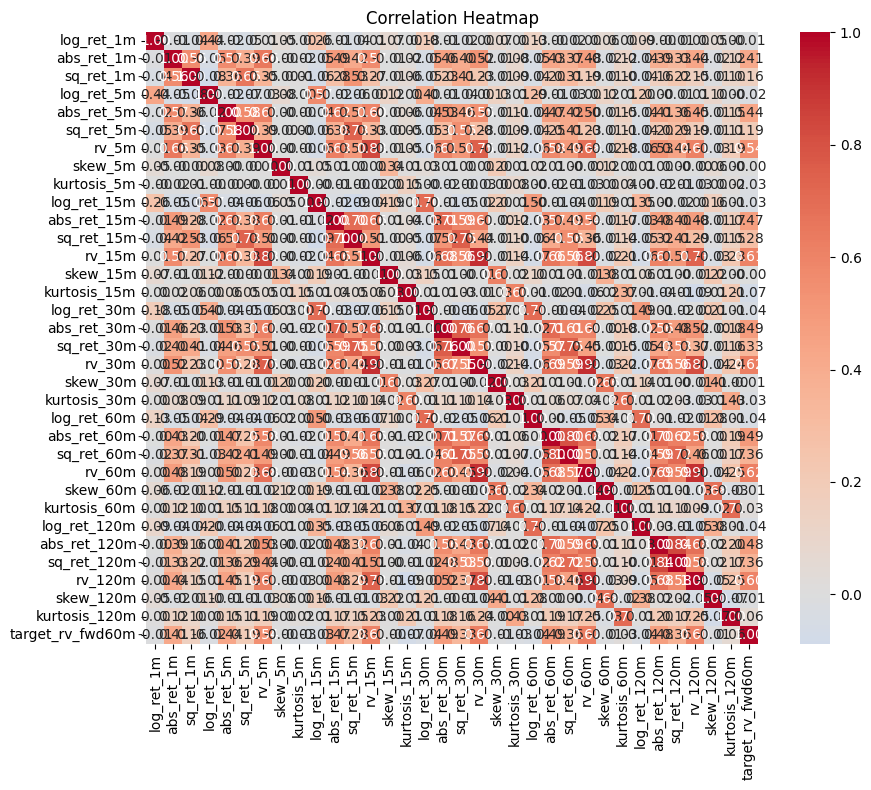

In [11]:
df_corr = pd.concat(
    [feature_ret_df, target_rv_df],
    axis=1
)

corr = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    square=True
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

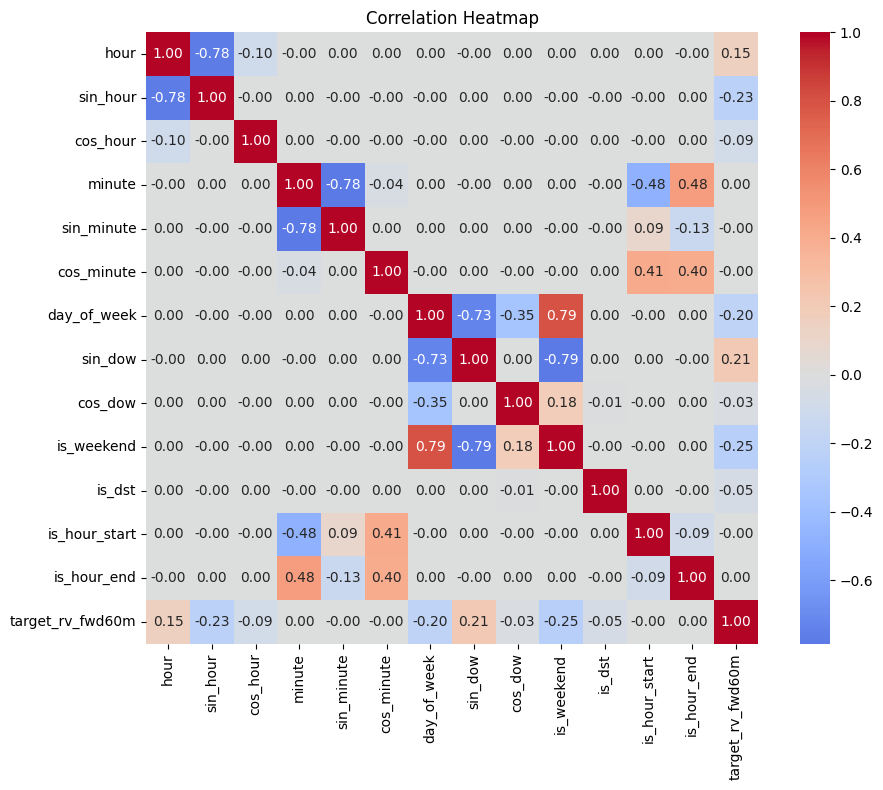

In [12]:
df_corr = pd.concat(
    [feature_seas_df, target_rv_df],
    axis=1
)

corr = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    square=True
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()